In [17]:
import sys
sys.path.append('..')

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from tree.DecisionTreeClassifier import DecisionTreeClassifier as MyDecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of sklearn decision tree classifier:', accuracy_score(y_test, y_pred))
print('MSE of sklearn decision tree classifier:', mean_squared_error(y_test, y_pred))

# Train a decision tree classifier
my_clf = MyDecisionTreeClassifier(max_depth=5)
my_clf.fit(X_train, y_train.reshape(-1, 1))
y_pred = my_clf.predict(X_test)
print('Accuracy of my decision tree classifier:', accuracy_score(y_test, y_pred))
print('MSE of my decision tree classifier:', mean_squared_error(y_test, y_pred))




Accuracy of sklearn decision tree classifier: 1.0
MSE of sklearn decision tree classifier: 0.0
Accuracy of my decision tree classifier: 0.9555555555555556
MSE of my decision tree classifier: 0.044444444444444446


In [34]:
import numpy as np
from model_selection import train_test_split
from metrics import accuracy_score
import time

from sklearn.datasets import fetch_covtype

data = fetch_covtype()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_classifier():
    accuracies = []
    trainig_times = []

    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf = DecisionTreeClassifier(max_depth=5)
        start = time.time()
        clf.fit(X_train, y_train)
        trainig_times.append(time.time() - start)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), accuracies)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), trainig_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Time')
    plt.title('Time vs Number of samples')
    plt.show()
    


def generate_random_dataset(size, features=2):
    # Generate random data
    data = np.random.rand(size, features)
    
    return data

def benchmark(classifier, features=2):
    accuracies = []
    times = []
    for i in range(100, 5000, 50):
        X = generate_random_dataset(i, features)
        y = np.random.randint(0, 2, i)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = classifier()
        start = time.time()
        clf.fit(X_train, y_train.reshape(-1, 1))
        times.append(time.time() - start)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), accuracies)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), times)
    plt.xlabel('Number of samples')
    plt.ylabel('Time')
    plt.title('Time vs Number of samples')
    plt.show()
    


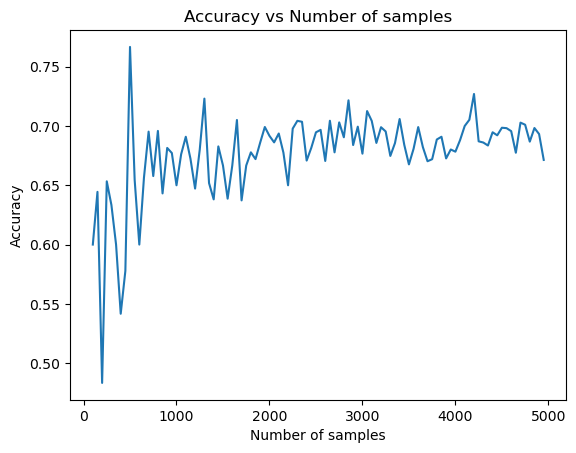

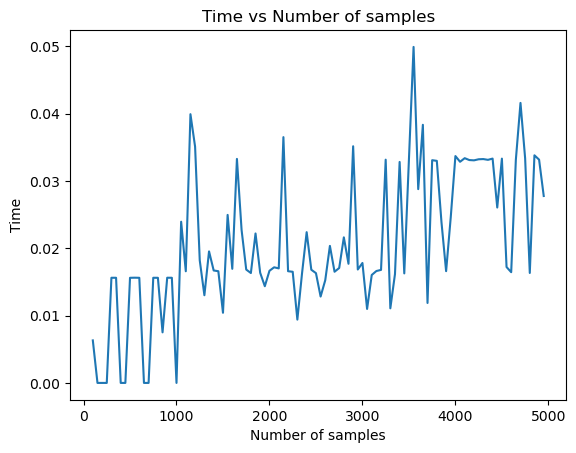

In [35]:
benchmark_classifier()

In [32]:
from tree.DecisionTreeClassifier import DecisionTreeClassifier as MyDecisionTreeClassifier
benchmark(MyDecisionTreeClassifier)

KeyboardInterrupt: 

In [21]:
# do same as before but with regression
from sklearn.tree import DecisionTreeRegressor
from tree.DecisionTreeRegressor import DecisionTreeRegressor as MyDecisionTreeRegressor

# train a decision tree regressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE of sklearn decision tree regressor:', mean_squared_error(y_test, y_pred))

# train a decision tree regressor
my_reg = MyDecisionTreeRegressor(max_depth=5)
my_reg.fit(X_train, y_train.reshape(-1, 1))
y_pred = my_reg.predict(X_test)
print('MSE of my decision tree regressor:', mean_squared_error(y_test, y_pred))

MSE of sklearn decision tree regressor: 0.0
MSE of my decision tree regressor: 0.044444444444444446


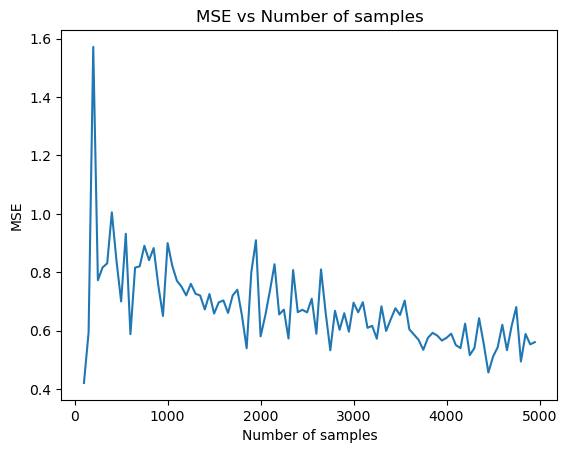

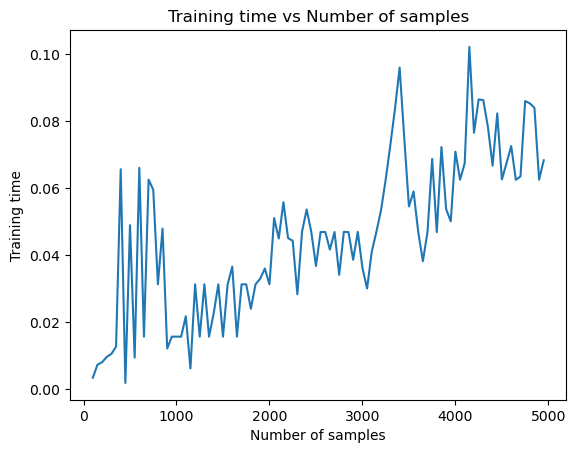

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import time

# Load the california housing dataset
data = fetch_california_housing()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_regressor():
    mse = []
    train_times = []
    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        reg = DecisionTreeRegressor(max_depth=10)
        start = time.time()
        reg.fit(X_train, y_train)
        train_times.append(time.time() - start)
        y_pred = reg.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), mse)
    plt.xlabel('Number of samples')
    plt.ylabel('MSE')
    plt.title('MSE vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), train_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Training time')
    plt.title('Training time vs Number of samples')
    plt.show()

benchmark_regressor()

In [ ]:
X.shape

(150, 4)